In [1]:
from Dortmund.Fehlerfortpflanzunganalyse.analysis_utilily import *

_plot_data = False

_plot_analysis = True

_save = False


ModuleNotFoundError: No module named 'Dortmund'

## Plate Reader Daten

## Regrissionsgraden 

### Warum werden Regressionsgeraden benötigt?

Bei der Konzentrationsbestimmung von Proteinen mittels Bradford-Assay nach dem Protokoll von Bradford (1976) sind Regressionsgeraden (Kalibriergeraden) aus folgenden Gründen essentiell:

#### **Quantitative Analyse**
- Der Bradford-Assay liefert zunächst nur **relative Messwerte** (OD-Werte)
- Die OD ist direkt proportional zur Proteinmenge in einem bestimmten Konzentrationsbereich.
- Diese müssen in **absolute Konzentrationen** umgerechnet werden
- Die Kalibriergerade stellt die mathematische Beziehung zwischen Messsignal und Konzentration her

#### **Nicht-lineare Beziehung**
- Die Beziehung zwischen Proteinkonzentration und Absorption ist **nicht immer linear**
- Besonders bei höheren Konzentrationen kann Sättigung auftreten

#### **Mathematische Grundlage**
Die Kalibriergerade folgt typischerweise dem Modell:
```
Absorption = m × Konzentration + b
```
Wobei:
- `m` = Steigung (Sensitivität des Assays)
- `b` = y-Achsenabschnitt (Grundabsorption)


In [ ]:
nadh_kalibriungs_daten = get_data_xlsx(r"C:\Users\berger\Documents\Projekts\MichealisMenten\Dortmund\Fehlerfortpflanzunganalyse\Daten\Rohdaten\Plate Reader\Kalibriergeraden\NADH_Kalibriergerade.xlsx")
nadph_kalibriungs_daten = get_data_xlsx(r"C:\Users\berger\Documents\Projekts\MichealisMenten\Dortmund\Fehlerfortpflanzunganalyse\Daten\Rohdaten\Plate Reader\Kalibriergeraden\NADPH_Kalibriergerade.xlsx")

if _plot_data:
    nadh_kalibriungs_daten.plot()
    nadph_kalibriungs_daten.plot()


NADH Regression: (np.float64(2.9966805555555545), np.float64(0.12563599537037035))
NADPH Regression: (np.float64(2.687190476190477), np.float64(0.132129365079365))


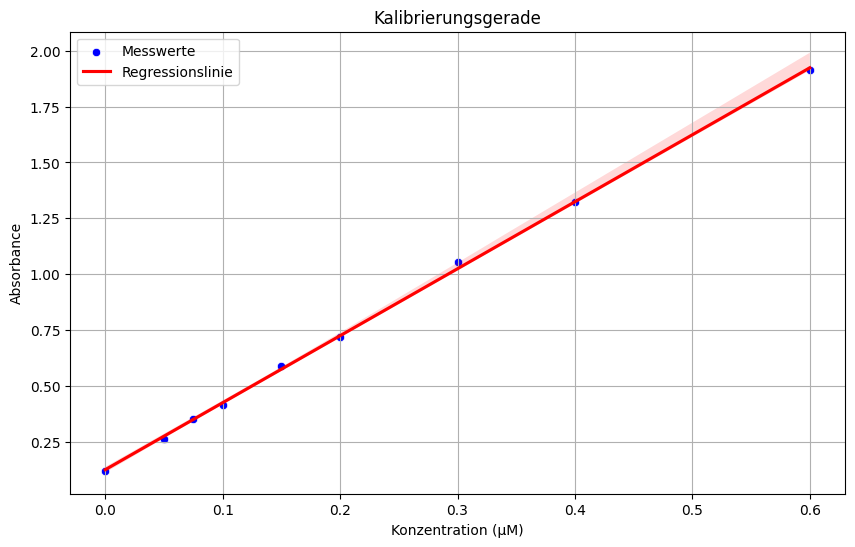

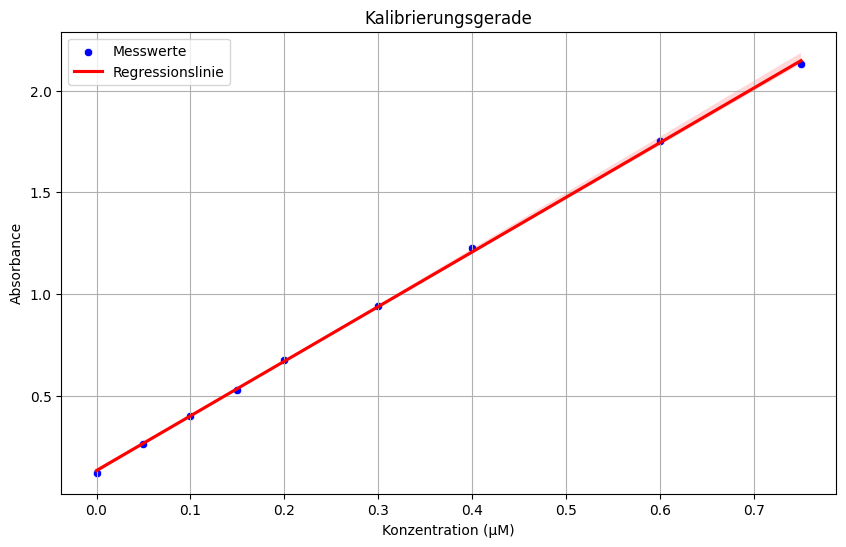

In [ ]:
# Get regression coefficients

nadh_regression = get_regression(nadh_kalibriungs_daten.NADH, nadh_kalibriungs_daten.Mittelwert)
nadph_regression = get_regression(nadph_kalibriungs_daten.NADPH, nadph_kalibriungs_daten.Mittelwert)

print(f"NADH Regression: {nadh_regression}")
print(f"NADPH Regression: {nadph_regression}")

# define linear functions 
def nadh_linear(x):
    return nadh_regression[0] * x + nadh_regression[1]

def nadph_linear(x):
    return nadph_regression[0] * x + nadph_regression[1]

if _plot_analysis:
    nadh_x = nadh_kalibriungs_daten.NADH
    nadh_y = nadh_kalibriungs_daten.Mittelwert
    plot_kalibriungs_grade(nadh_x, nadh_y)

    nadph_x = nadph_kalibriungs_daten.NADPH
    nadph_y = nadph_kalibriungs_daten.Mittelwert
    plot_kalibriungs_grade(nadph_x, nadph_y)


In [ ]:
# statisitsche Analyse der Kalibriergeraden

nadh_stats = get_stats(nadh_kalibriungs_daten.Mittelwert, nadh_kalibriungs_daten.NADH)
nadph_stats = get_stats(nadph_kalibriungs_daten.Mittelwert, nadph_kalibriungs_daten.NADPH)

print(f"NADH Stats: {nadh_stats}")
print(f"NADPH Stats: {nadph_stats}")

NADH Stats: {'r_squared': np.float64(0.9994346551343977), 'std_err': np.float64(0.00492230288266289)}
NADPH Stats: {'r_squared': np.float64(0.9997549134799146), 'std_err': np.float64(0.004287363876136755)}
